In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import interp1d
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Times New Roman",
  "font.size": 10,
  "axes.labelsize": 10,
  "xtick.labelsize": 10,
  "ytick.labelsize": 10,
  "legend.fontsize": 8,
})
plt.style.use(['science', 'ieee', 'grid'])
from IPython.display import display
from sympy.printing import latex

### Leerlaufversuch: $U_q = f(I_E)$

In [2]:
# steigend
I_E_s = np.array([0.0, 0.1, 0.2, 0.4, 0.8, 1.2, 1.4, 1.6, 1.8, 2.0])
U_q_s = np.array([6.4, 15.9, 28.5, 52.35, 103.62, 151.8, 171.7, 191.7, 209.6, 225.2])

# fallend
I_E_f = np.array([1.8, 1.6, 1.4, 1.2, 0.8, 0.4, 0.2, 0.1, 0])
U_q_f = np.array([212.2, 197.3, 178.4, 157.4, 111, 59.6, 33.8, 19.24, 7.1])

data = []
I_E = []
U_q = []

for i in range(len(I_E_s)):
    I_E.append(I_E_s[i])
    U_q.append(U_q_s[i])
for j in range(len(I_E_f)):
    I_E.append(I_E_f[j])
    U_q.append(U_q_f[j])
for i in range(len(I_E)):
    data.append([I_E[i], U_q[i]])
# pd.DataFrame(data, columns=["$I_E[A]$", "$U_q[V]$"]).to_latex("tables/GM_Calculations.tex", index=False)
pd.DataFrame(data, columns=["$I_E[A]$", "$U_q[V]$"])


,$I_E[A]$,$U_q[V]$
0,0.0,6.40
1,0.1,15.90
2,0.2,28.50
3,0.4,52.35
4,0.8,103.62
5,1.2,151.80
6,1.4,171.70
7,1.6,191.70
8,1.8,209.60
9,2.0,225.20


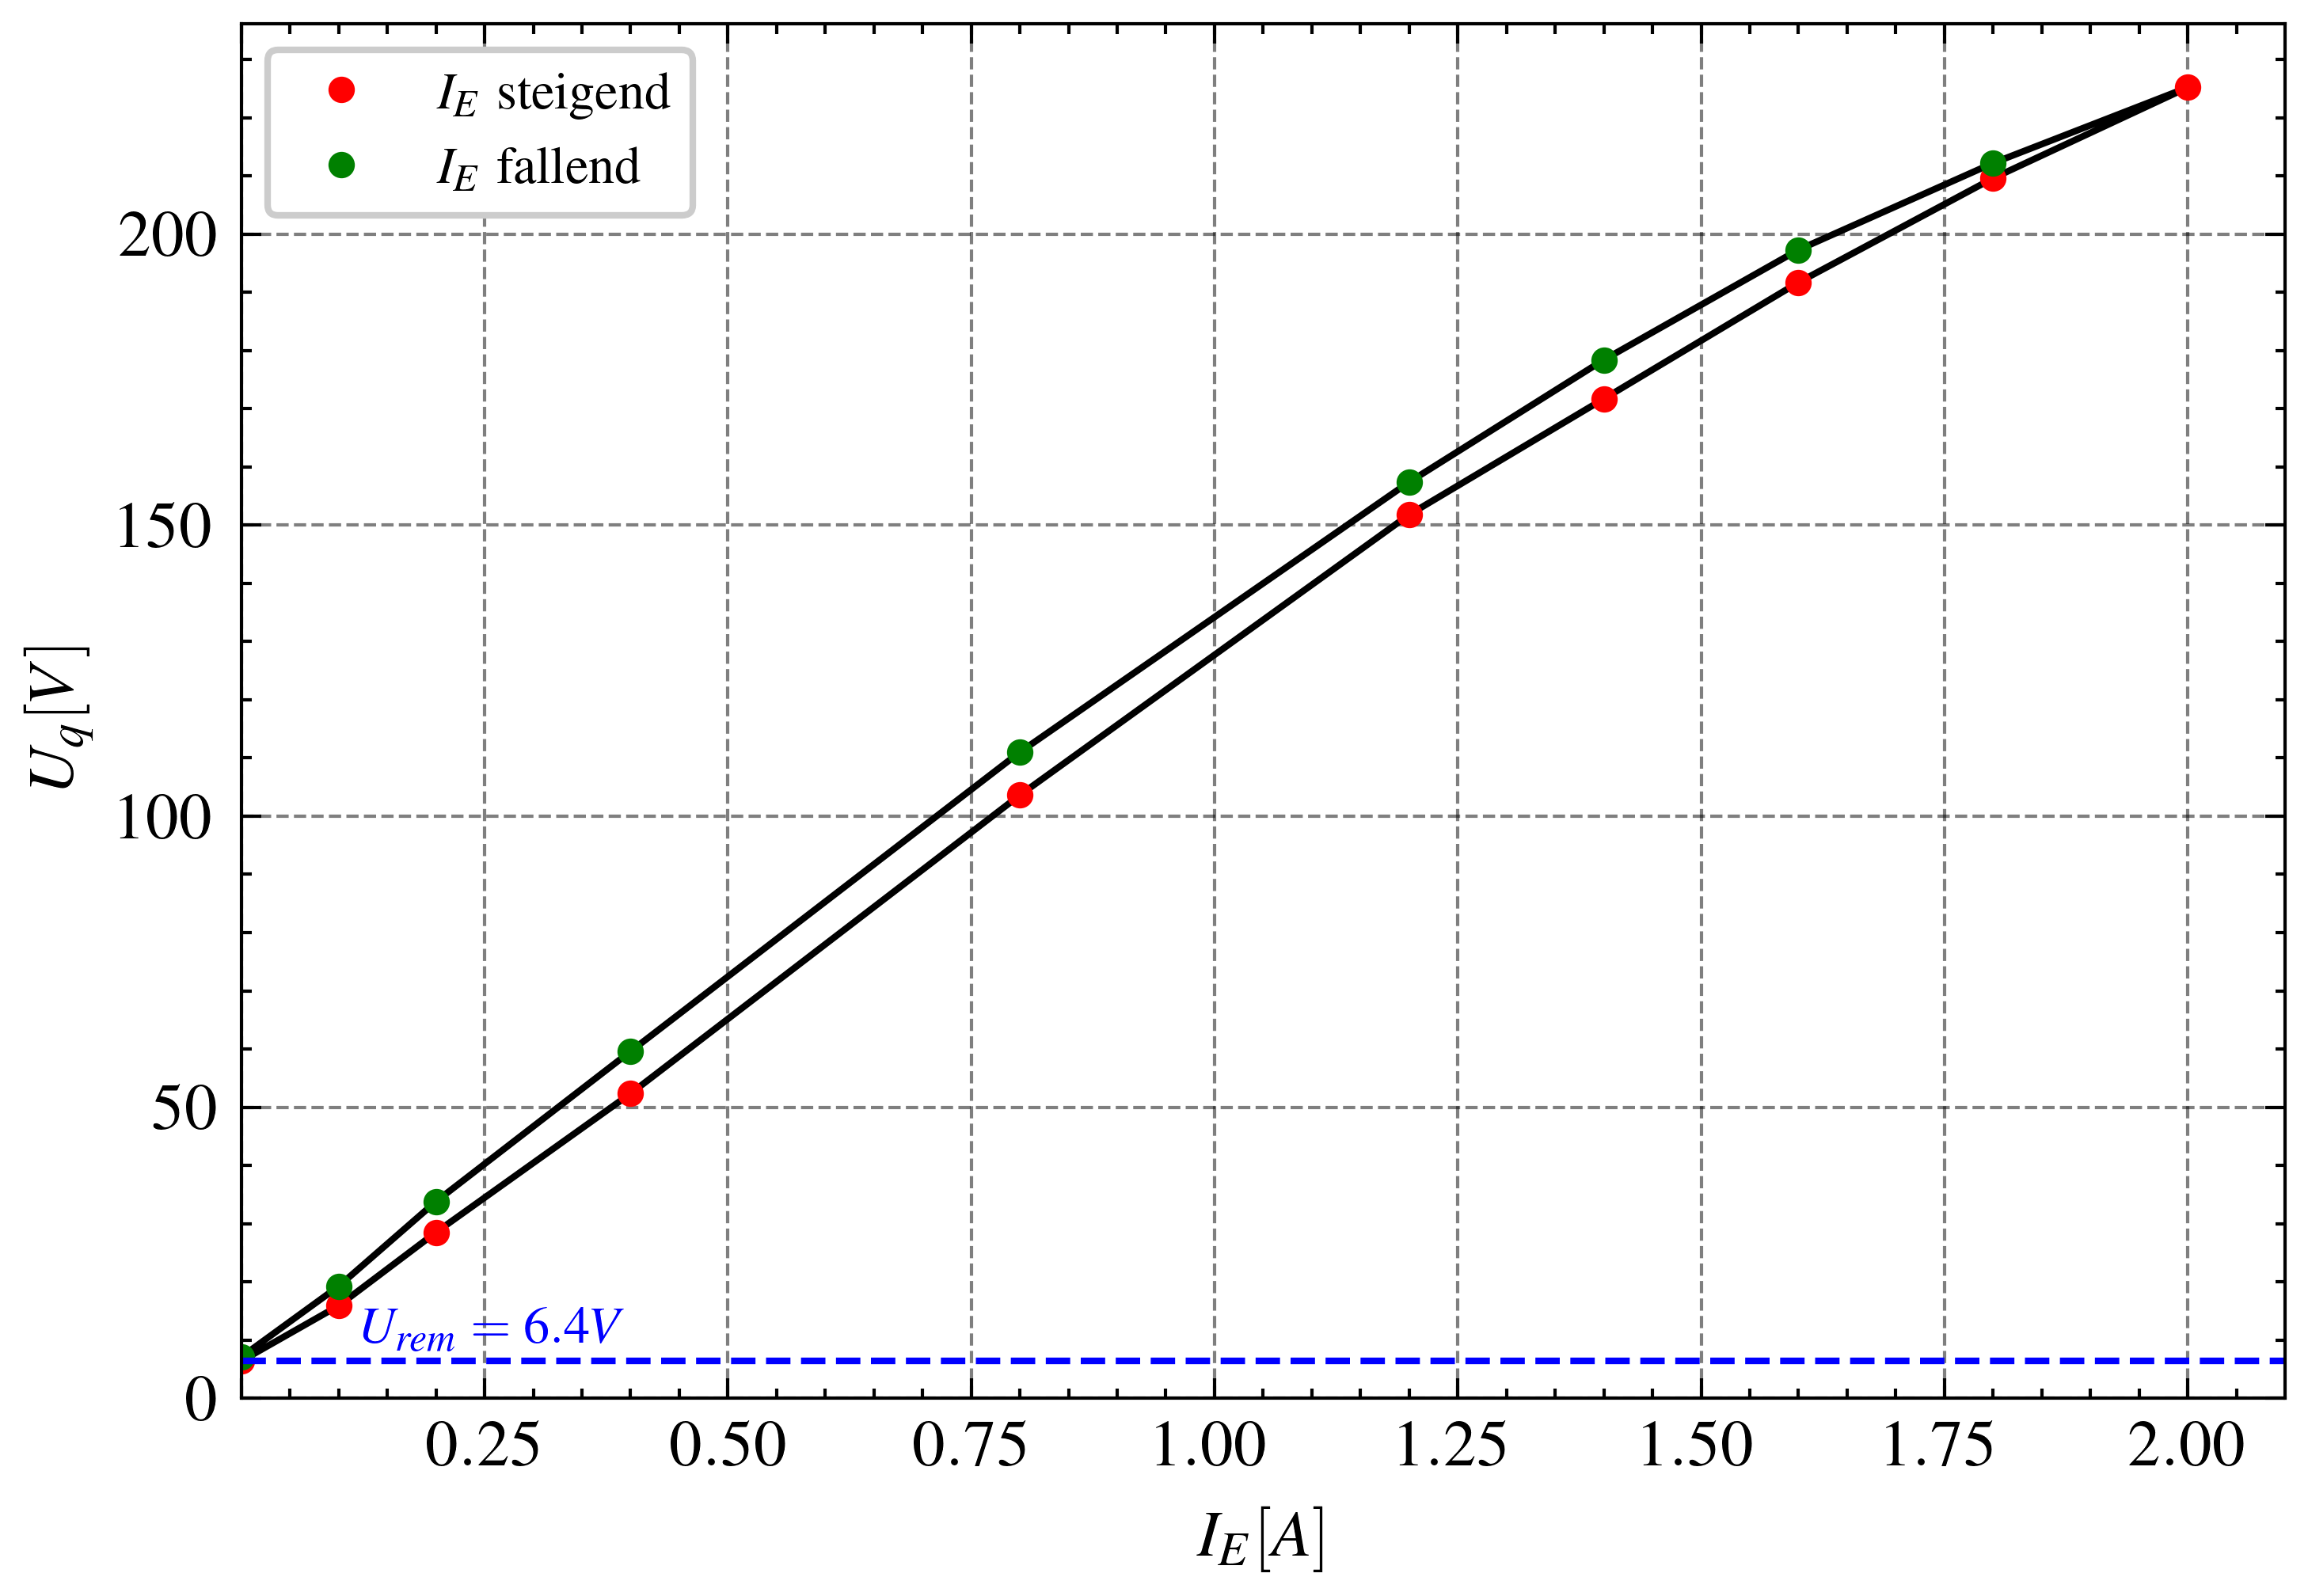

In [3]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.plot(I_E, U_q, "-")
ax.plot(I_E_s, U_q_s, "r.", label="$I_E$ steigend")
ax.plot(I_E_f, U_q_f, "g.", label="$I_E$ fallend")
ax.axhline(y=U_q[0], color="b", linestyle="--")
ax.annotate(f"$U_{{rem}}={min(U_q)}V$", xy=(I_E[0], U_q[0]), xytext=(0.125, U_q[0]+3), color="b")

ax.set_xlabel("$I_E[A]$")
ax.set_ylabel("$U_q[V]$")
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.get_xaxis().get_ticklabels()[0].set_visible(False)
ax.legend()
plt.tight_layout()
plt.savefig("plots/Leerlaufversuch_Uq_I_E.png", dpi=300)


### Leerlaufversuch: $U_q = f(n)$

In [4]:
n = np.array([0, 200, 500, 800, 1200, 1400, 1600])
U_q_n = np.array([0, 27.91, 70.58, 111.38, 165.4, 192.9, 220.2])
c_dot_phi = U_q_n[1:] / n[1:]
c_dot_phi = np.insert(c_dot_phi, 0, 0)
c_dot_phi

data = []

for i in range(len(n)):
    data.append([n[i], U_q_n[i], round(c_dot_phi[i], 3)])
# pd.DataFrame(data, columns=["$n[min^{-1}]$", "$U_q[V]$", "$c_\cdot{\phi}[V/s]$"]).to_latex("tables/Leerlaufversuch_Uq_n.tex", index=False)
pd.DataFrame(data, columns=["$n[min^{-1}]$", "$U_q[V]$", "$c_\cdot{\phi}[V/s]$"])

,$n[min^{-1}]$,$U_q[V]$,$c_\cdot{\phi}[V/s]$
0,0,0.00,0.000
1,200,27.91,0.140
2,500,70.58,0.141
3,800,111.38,0.139
4,1200,165.40,0.138
5,1400,192.90,0.138
6,1600,220.20,0.138


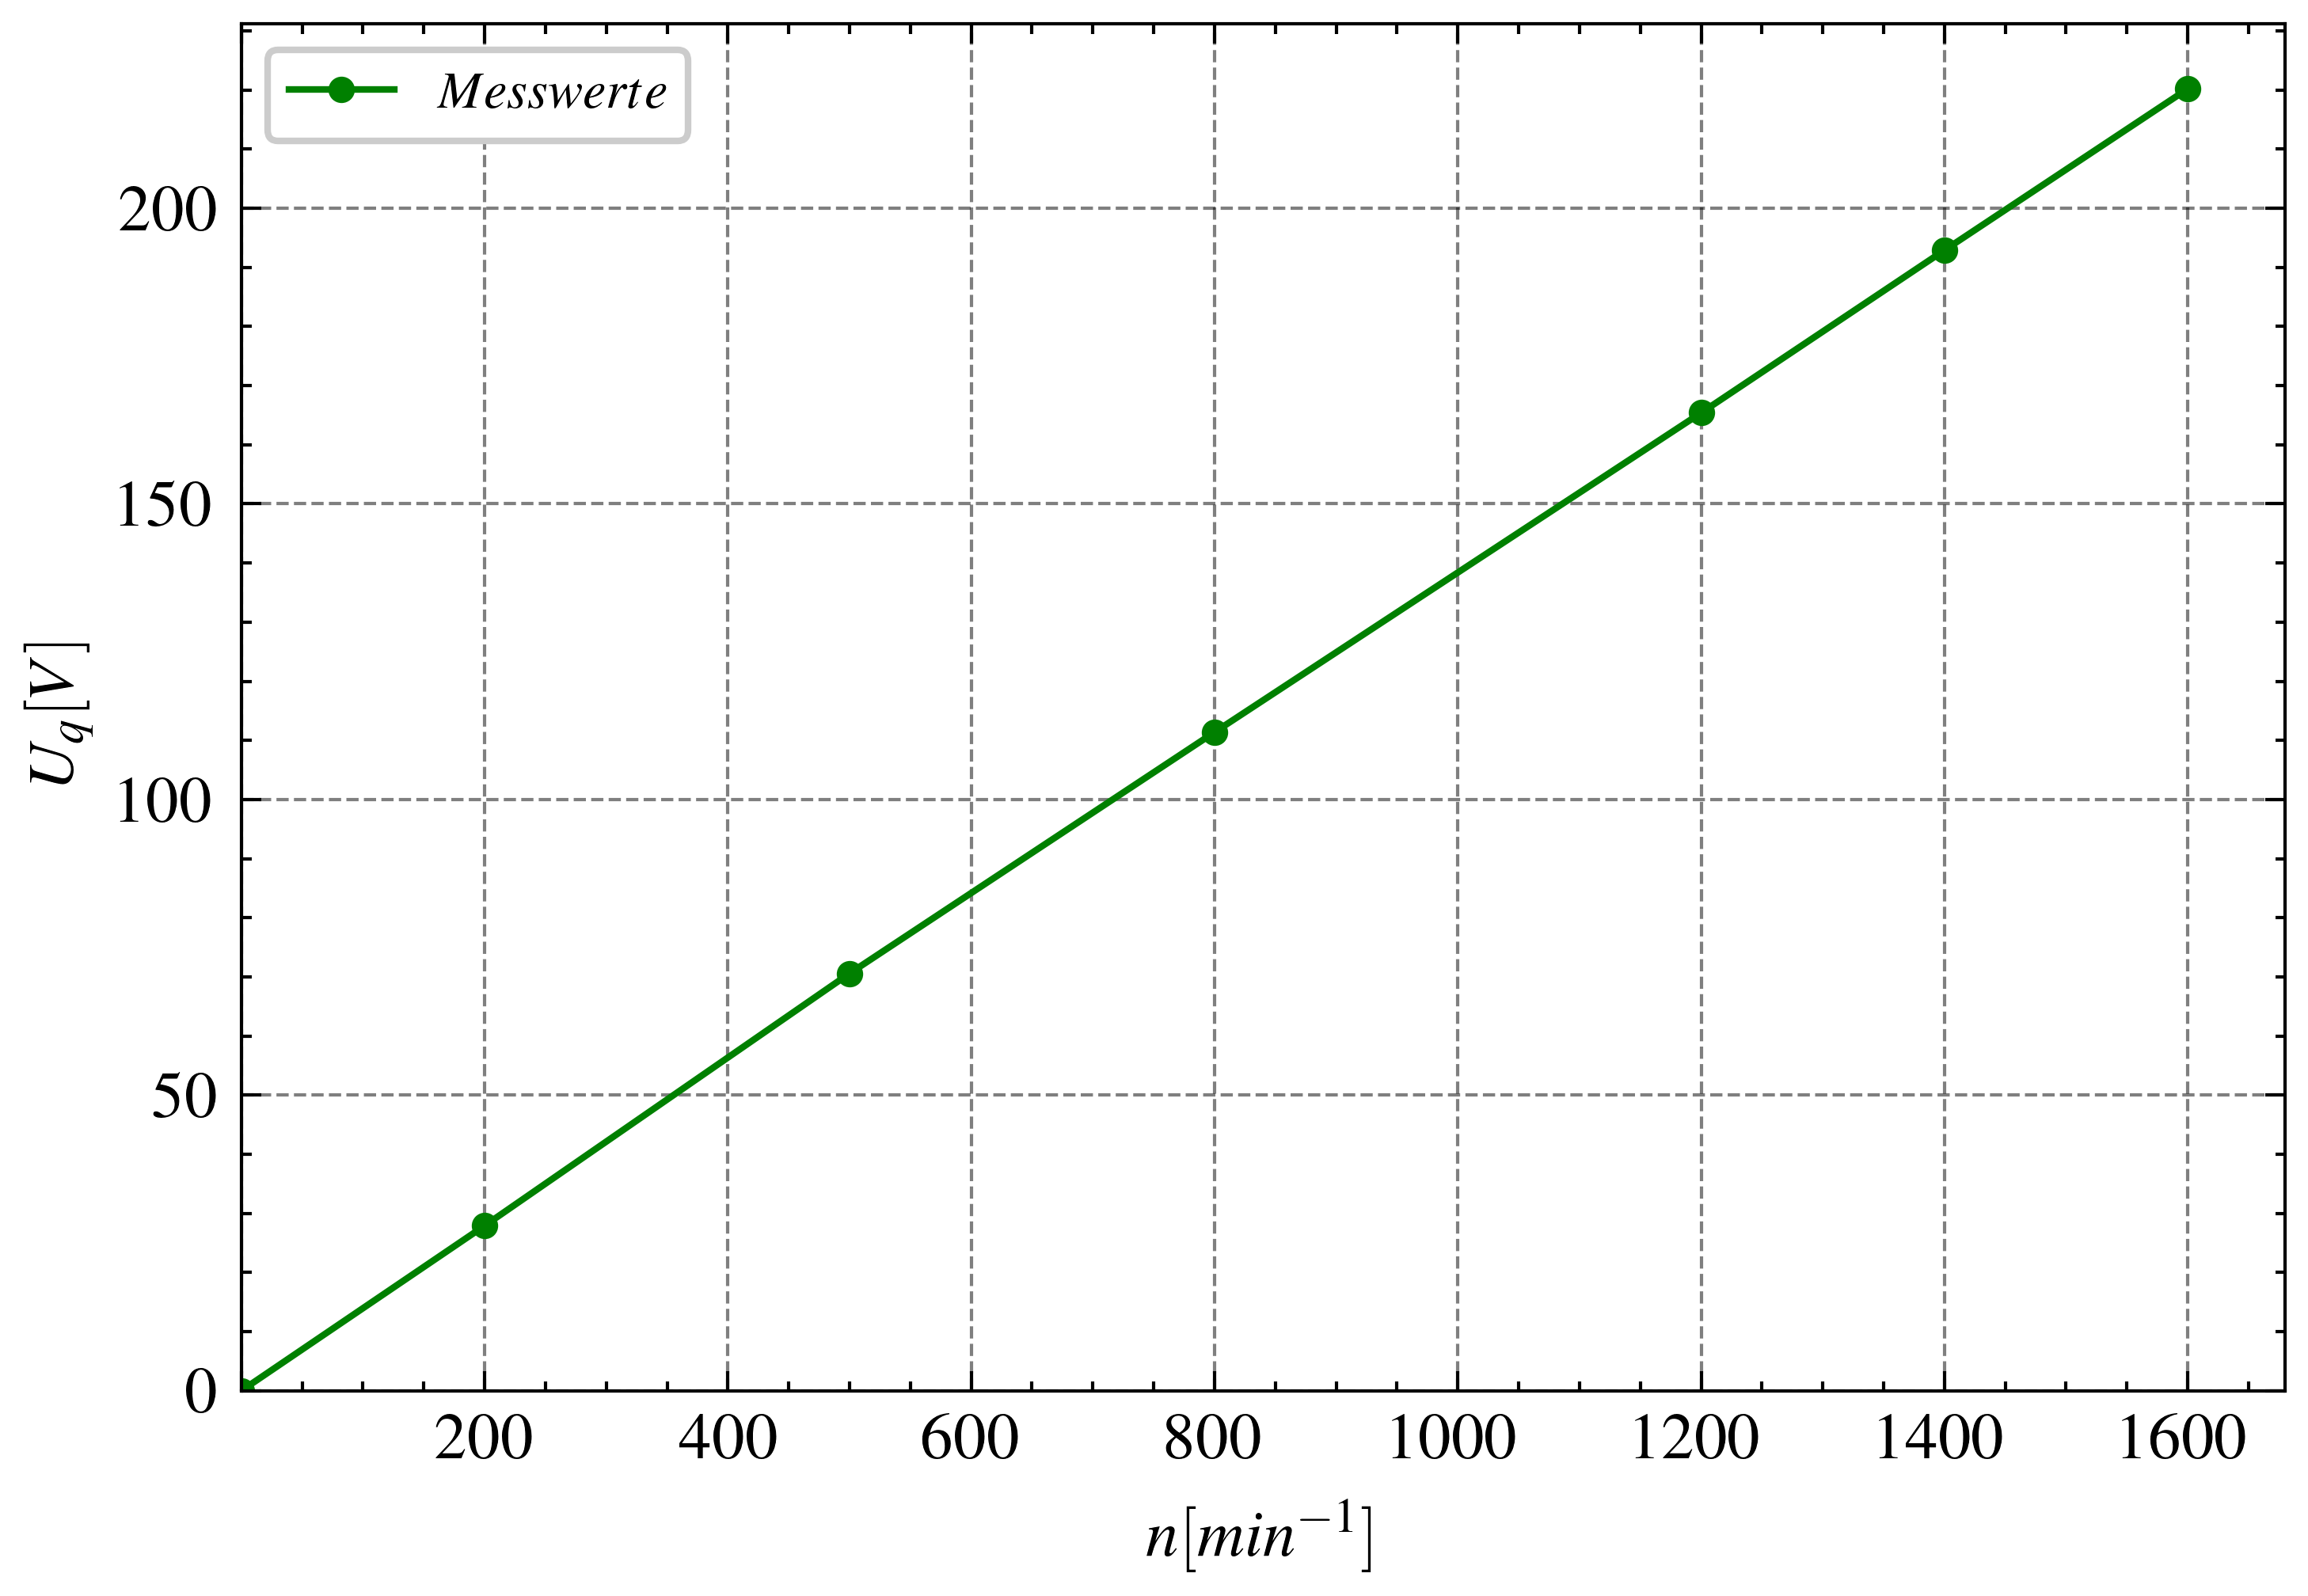

In [5]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.plot(n, U_q_n, "g.-", label="$Messwerte$")
ax.set_xlabel("$n[min^{-1}]$")
ax.set_ylabel("$U_q[V]$")
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.get_xaxis().get_ticklabels()[0].set_visible(False)
ax.legend()
plt.tight_layout()
# plt.savefig("plots/Leerlaufversuch_Uq_n.png", dpi=300)

### Drehzahlverstellung

In [6]:
# Ankerstellbereich
U_A_A = np.array([0,40,80,120,160,200,230])
I_E_A = np.ones(len(U_A_A))*1.8
I_A_A = np.array([0,1.2,1.4,1.5,1.7,1.8,1.9])
n_A = np.array([0,275,561,847,1138,1427,1647])

# Feldstellbereich
U_A_F = np.ones(3)*230
I_E_F = np.array([1.6,1.4,1.2])
I_A_F = np.array([2,2.2,2.55])
n_F = np.array([1745,1918,2177])

data_A = []
data_F = []

n = np.append(n_A, n_F)
U_A = np.append(U_A_A, U_A_F)
I_E = np.append(I_E_A, I_E_F)
I_A = np.append(I_A_A, I_A_F)

for i in range(len(U_A_A)):
    data_A.append([U_A_A[i], I_E_A[i], I_A_A[i], n_A[i]])
for i in range(len(U_A_F)):
    data_F.append([U_A_F[i], I_E_F[i], I_A_F[i], n_F[i]])
# pd.DataFrame(data_A, columns=["$U_A[V]$", "$I_E[A]$", "$I_A[A]$", "$n[min^{-1}]$"]).to_latex("tables/Ankerstellbereich.tex", index=False)
# pd.DataFrame(data_F, columns=["$U_A[V]$", "$I_E[A]$", "$I_A[A]$", "$n[min^{-1}]$"]).to_latex("tables/Feldstellbereich.tex", index=False)
display(pd.DataFrame(data_A, columns=["$U_A[V]$", "$I_E[A]$", "$I_A[A]$", "$n[min^{-1}]$"]), pd.DataFrame(data_F, columns=["$U_A[V]$", "$I_E[A]$", "$I_A[A]$", "$n[min^{-1}]$"]))

,$U_A[V]$,$I_E[A]$,$I_A[A]$,$n[min^{-1}]$
0,0,1.8,0.0,0
1,40,1.8,1.2,275
2,80,1.8,1.4,561
3,120,1.8,1.5,847
4,160,1.8,1.7,1138
5,200,1.8,1.8,1427
6,230,1.8,1.9,1647


,$U_A[V]$,$I_E[A]$,$I_A[A]$,$n[min^{-1}]$
0,230.0,1.6,2.00,1745
1,230.0,1.4,2.20,1918
2,230.0,1.2,2.55,2177


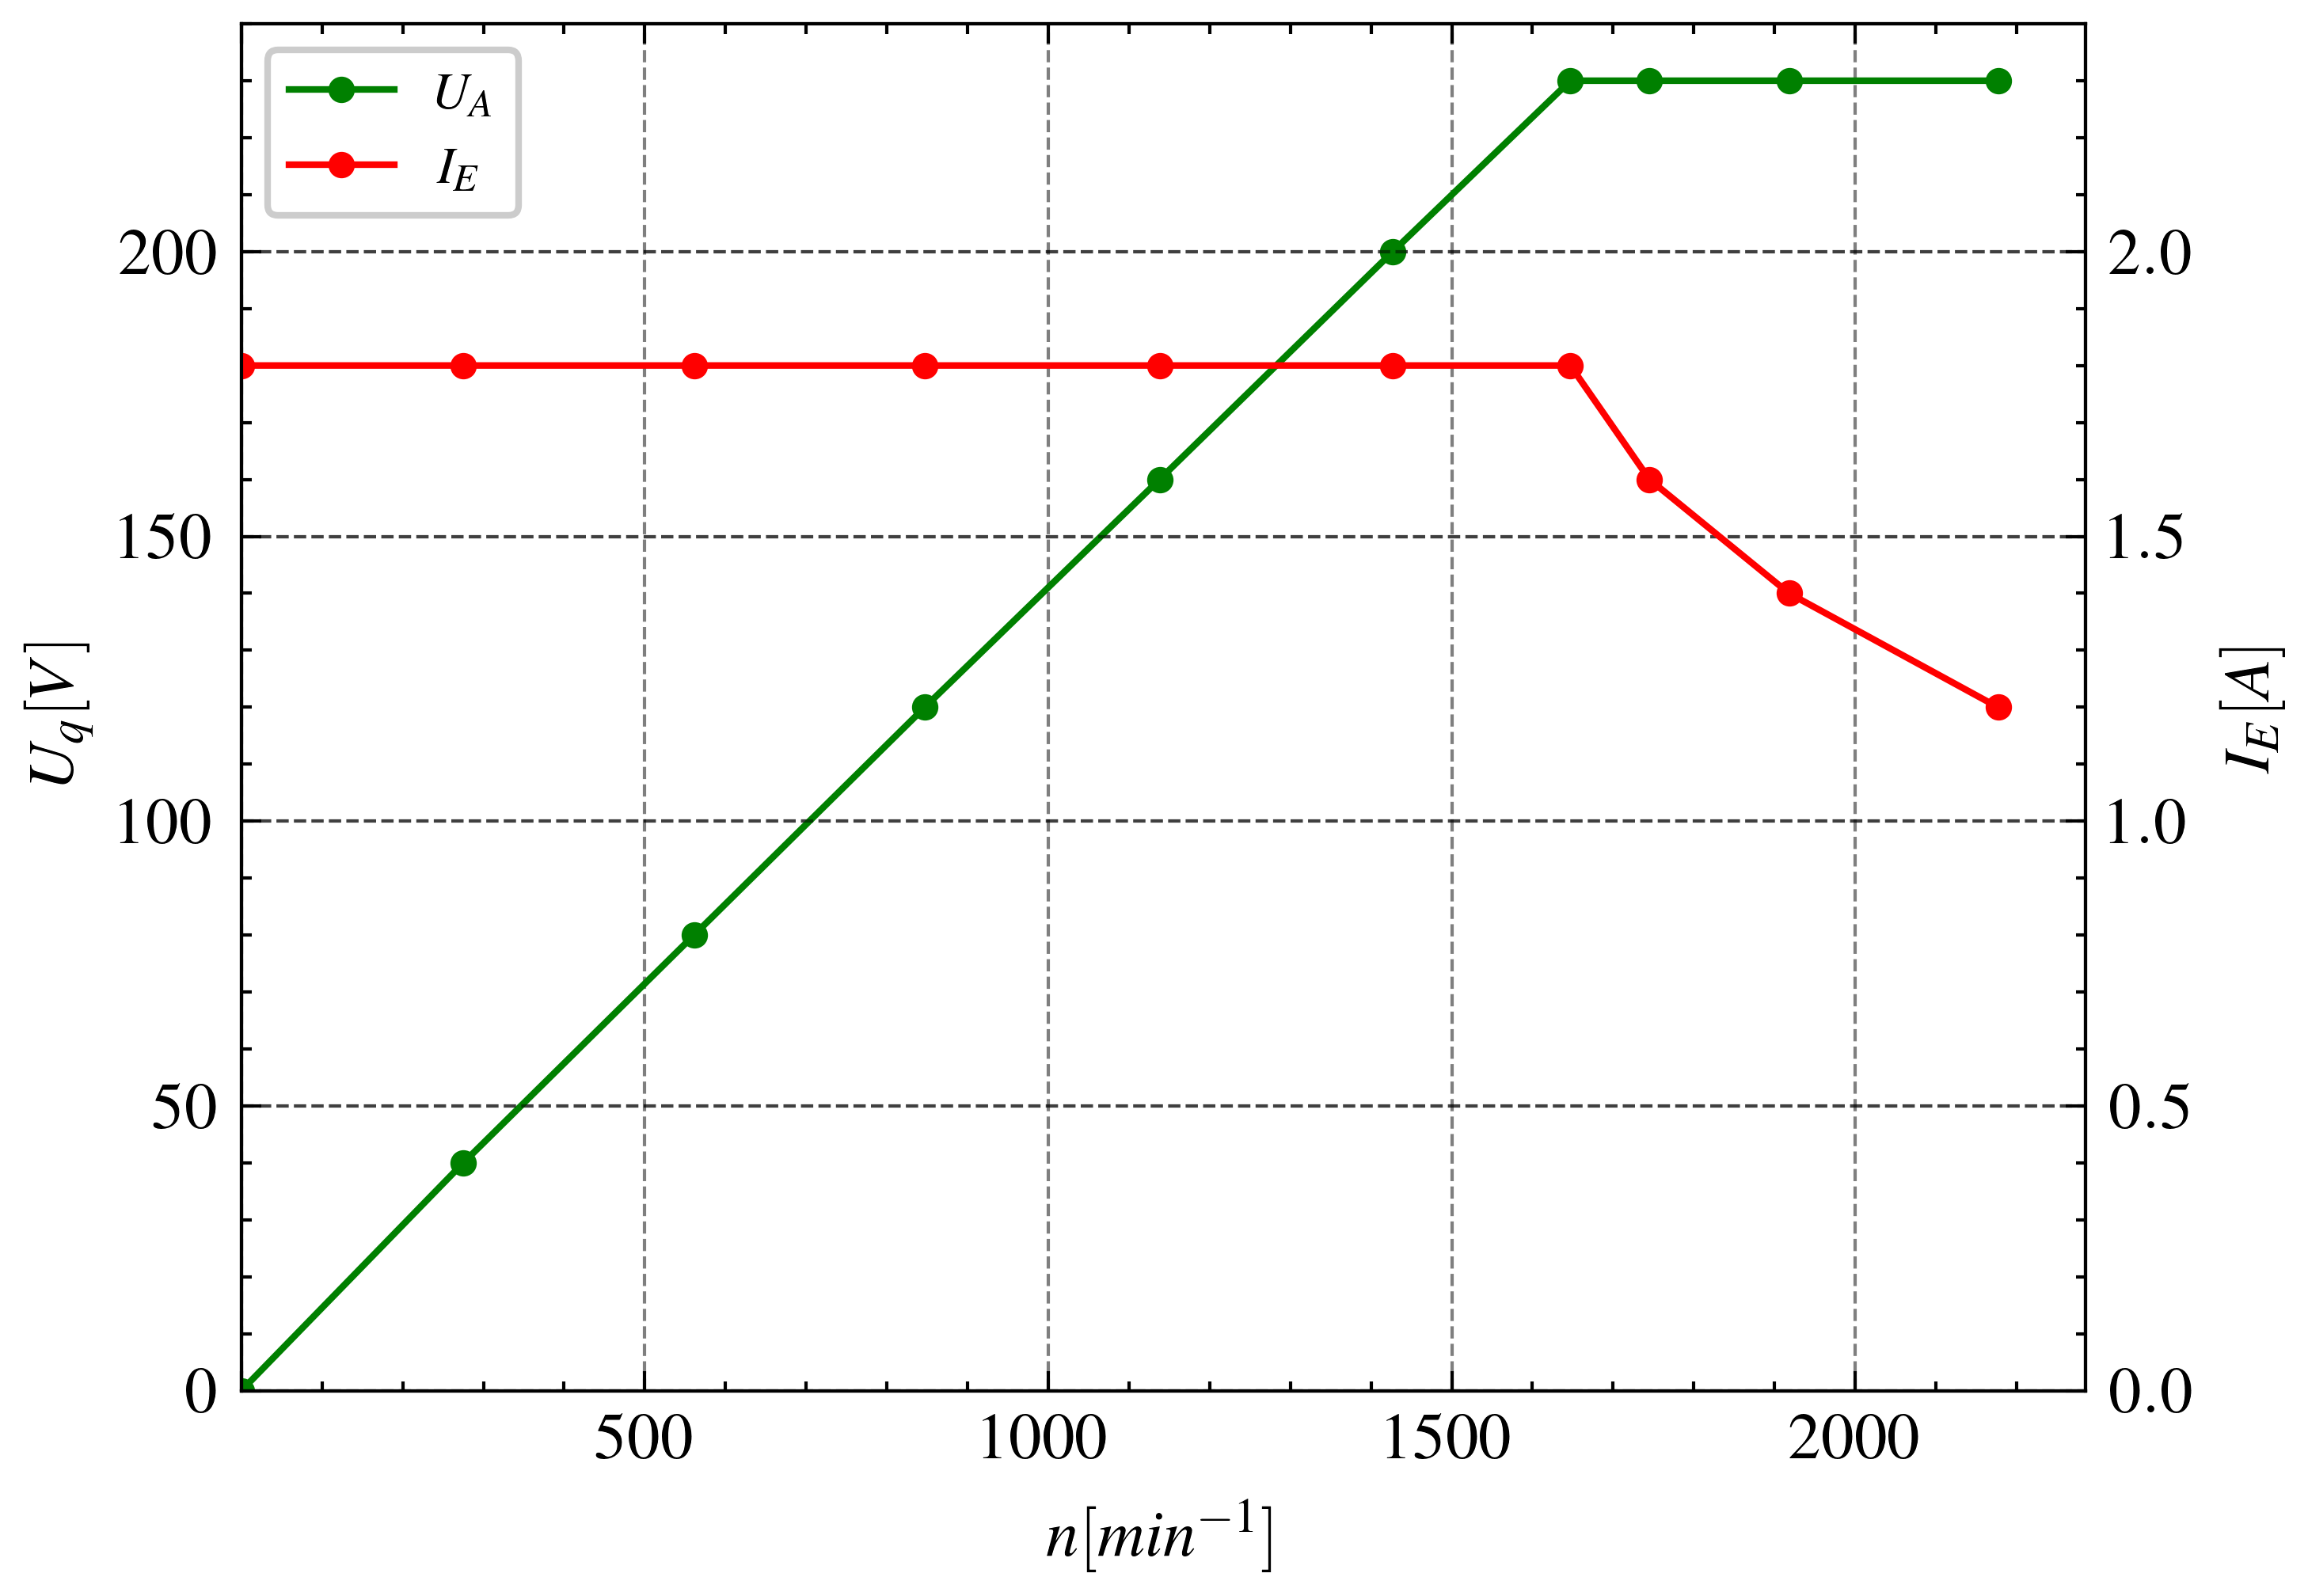

In [7]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax2 = ax.twinx()
p1, = ax.plot(n, U_A, "g.-", label="$U_A$")
p2, = ax2.plot(n, I_E, "r.-", label="$I_E$")
ax.set_xlabel("$n[min^{-1}]$")
ax.set_ylabel("$U_q[V]$")
ax2.set_ylabel("$I_E[A]$")
ax2.set_ylim(0, 2.4)
ax2.set_xlim(left=0)
ax.set_ylim(0, 240)
ax.set_xlim(left=0)
ax.get_xaxis().get_ticklabels()[0].set_visible(False)
ax.legend(handles=[p1, p2])
plt.tight_layout()
# plt.savefig("plots/Stellbereiche.png", dpi=300)


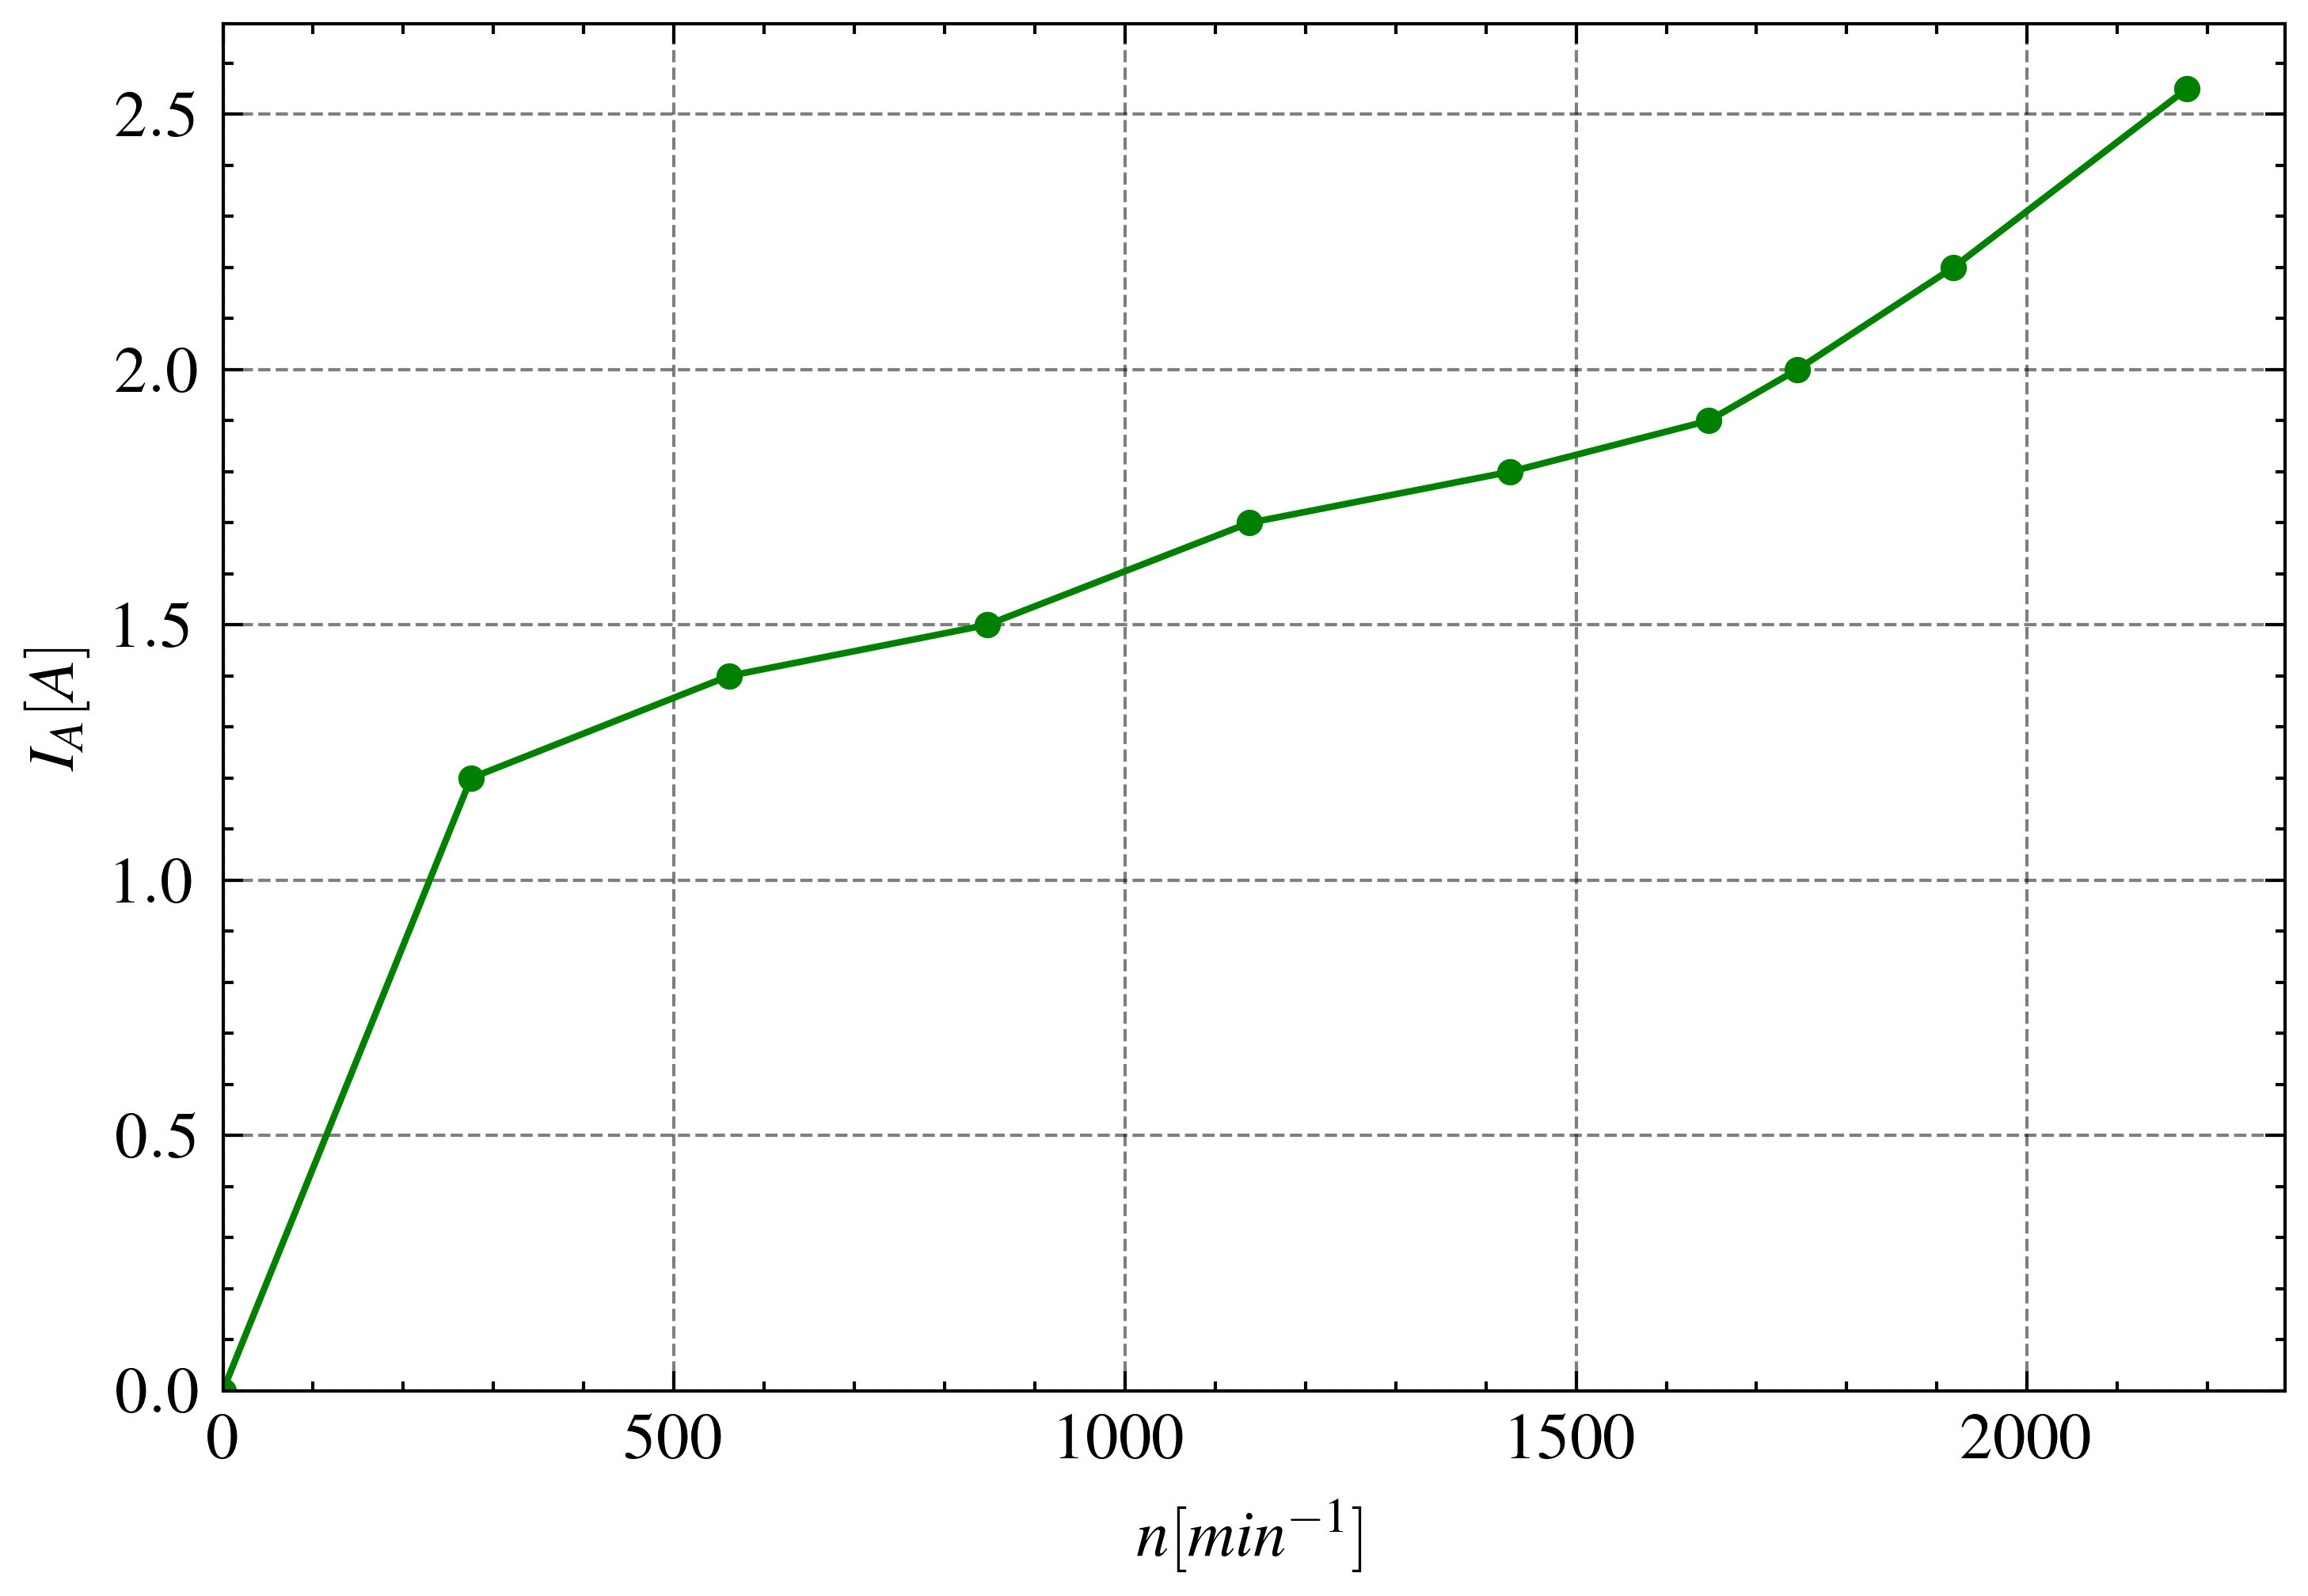

In [8]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.plot(n, I_A, "g.-")
ax.set_xlabel("$n[min^{-1}]$")
ax.set_ylabel("$I_A[A]$")
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.tight_layout()
# plt.savefig("plots/Drehzahlverstellung.png", dpi=300)